In [60]:
import numpy as np
from matplotlib import pyplot as plt
import collections

In [27]:
with open('Wiki-Vote.txt', 'r') as file:
    text = file.read()

In [28]:
lst=text.split("#")[1:]

In [29]:
info=lst[2].split(" ")
n_nodes=int(info[2])
n_edges=int(info[4].replace("\n",""))
print(f"Number of Nodes: {n_nodes}")
print(f"Number of Edges: {n_edges}")

Number of Nodes: 7115
Number of Edges: 103689


# Edge List

In [30]:
edges=lst[3].split("\n")[1:-1]
edges=[edge.split("\t") for edge in edges]
edges

[['30', '1412'],
 ['30', '3352'],
 ['30', '5254'],
 ['30', '5543'],
 ['30', '7478'],
 ['3', '28'],
 ['3', '30'],
 ['3', '39'],
 ['3', '54'],
 ['3', '108'],
 ['3', '152'],
 ['3', '178'],
 ['3', '182'],
 ['3', '214'],
 ['3', '271'],
 ['3', '286'],
 ['3', '300'],
 ['3', '348'],
 ['3', '349'],
 ['3', '371'],
 ['3', '567'],
 ['3', '581'],
 ['3', '584'],
 ['3', '586'],
 ['3', '590'],
 ['3', '604'],
 ['3', '611'],
 ['3', '8283'],
 ['25', '3'],
 ['25', '6'],
 ['25', '8'],
 ['25', '19'],
 ['25', '23'],
 ['25', '28'],
 ['25', '29'],
 ['25', '30'],
 ['25', '33'],
 ['25', '35'],
 ['25', '50'],
 ['25', '54'],
 ['25', '55'],
 ['25', '75'],
 ['25', '80'],
 ['25', '86'],
 ['25', '94'],
 ['25', '127'],
 ['25', '152'],
 ['25', '154'],
 ['25', '182'],
 ['25', '192'],
 ['25', '214'],
 ['25', '224'],
 ['25', '226'],
 ['25', '246'],
 ['25', '252'],
 ['25', '255'],
 ['25', '257'],
 ['25', '261'],
 ['25', '271'],
 ['25', '273'],
 ['25', '280'],
 ['25', '282'],
 ['25', '286'],
 ['25', '299'],
 ['25', '300'],
 

# Finding unique node ids for making adjacency matrix

In [31]:
unique_nodes=[]
for edge in edges:
    node_from, node_to = int(edge[0]), int(edge[1])
    unique_nodes.append(node_from)
    unique_nodes.append(node_to)
unique_nodes=list(set(unique_nodes))
unique_nodes.sort()

# Adjacency Matrix

In [43]:
adjacency_matrix=np.zeros((7115,7115))
for edge in edges:
    node_from, node_to = int(edge[0]), int(edge[1])
    adjacency_matrix[unique_nodes.index(node_from)][unique_nodes.index(node_to)]=1
adjacency_matrix


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
np.where(adjacency_matrix==1)

(array([   0,    0,    0, ..., 7093, 7094, 7095], dtype=int64),
 array([  25,   27,   36, ..., 4420, 4420, 7096], dtype=int64))

# Avg Out-Degree and Node with Max-Out Degree

In [45]:
out_adjacency_list=dict()
for node in unique_nodes:
    out_adjacency_list[node]=[]
for edge in edges:
    node_from, node_to = int(edge[0]), int(edge[1])
    out_adjacency_list[node_from].append(node_to)

out_degrees={v: len(out_adjacency_list[v]) for v in out_adjacency_list}

In [46]:
out_sum=0
max_out=-1
max_out_node=-1
for node in out_degrees:
    out_nodes=out_degrees[node]
    if out_nodes > max_out:
        max_out=out_nodes
        max_out_node=node
    out_sum+=out_nodes
avg_out=out_sum/n_nodes
print(f"Avg. Out-Degree: {avg_out}")
print(f"Node with Max Out-Degree: {max_out_node} with Out-Degree: {max_out}")

Avg. Out-Degree: 14.573295853829936
Node with Max Out-Degree: 2565 with Out-Degree: 893


# Avg In-Degree and Node with Max In-Degree

In [47]:
in_adjacency_list=dict()
for node in unique_nodes:
    in_adjacency_list[node]=[]
for edge in edges:
    node_from, node_to = int(edge[0]), int(edge[1])
    in_adjacency_list[node_to].append(node_from)

in_degrees={v: len(in_adjacency_list[v]) for v in in_adjacency_list}

In [48]:
in_sum=0
max_in=-1
max_in_node=-1
for node in in_degrees:
    in_nodes=in_degrees[node]
    if in_nodes > max_in:
        max_in=in_nodes
        max_in_node=node
    in_sum+=in_nodes
avg_in=in_sum/n_nodes
print(f"Avg. In-Degree: {avg_in}")
print(f"Node with Max In-Degree: {max_in_node} with In-Degree: {max_in}")

Avg. In-Degree: 14.573295853829936
Node with Max In-Degree: 4037 with In-Degree: 457


In [49]:
# graph=dict()
# for node in unique_nodes:
#     graph[node]=[]

# for edge in edges:
#     node_from, node_to = int(edge[0]), int(edge[1])
#     graph[node_from].append(node_to)

# in_degrees={v: 0 for v in graph.keys()}
# for u in graph.keys():
#     for v in graph[u]:
#         in_degrees[v]+=1

# out_degrees={v: len(graph[v]) for v in graph.keys()}

# avg_in=sum(in_degrees.values())/len(in_degrees)
# avg_out=sum(out_degrees.values())/len(out_degrees)

# print(avg_in, avg_out)

# max_in=-1
# max_in_node=-1

# for node in in_degrees:
#     if in_degrees[node]>max_in:
#         max_in=in_degrees[node]
#         max_in_node=node
# print(max_in_node, max_in)

# max_out=-1
# max_out_node=-1

# for node in out_degrees:
#     if out_degrees[node]>max_out:
#         max_out=out_degrees[node]
#         max_out_node=node
# print(max_out_node, max_out)
    

# Density of Network

Density = |E| / |V||V-1| where |E| is number of edges and |V| is number of vertices

In [50]:
d = n_edges/(n_nodes*(n_nodes-1))
print(f"Density: {d}")

Density: 0.0020485375110809584


# In-Degree Distribution of Network

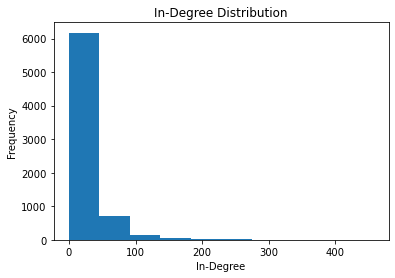

In [51]:
plt.hist(in_degrees.values())
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Frequency")
plt.show()

# Out-Degree Distribution of Network

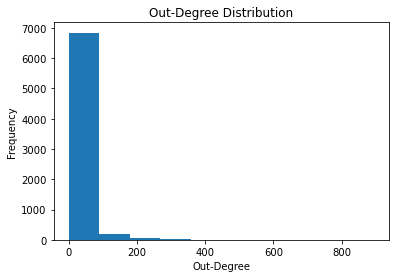

In [52]:
plt.hist(out_degrees.values())
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.show()

# Local Clustering Coefficient

## Converting directed graph to undirected graph

In [72]:
u_adjacency_matrix = adjacency_matrix + adjacency_matrix.T
u_adjacency_matrix[np.where(u_adjacency_matrix==2)]=1

## Finding LCC for each node

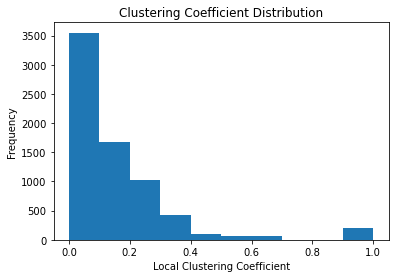

In [71]:
triangles = np.diag(np.linalg.matrix_power(u_adjacency_matrix, 3))/2

# in_degrees = np.sum(adjacency_matrix, axis=0)
# out_degrees = np.sum(adjacency_matrix, axis=1)
degrees = np.sum(u_adjacency_matrix, axis=0)
# connected_triples = in_degrees * out_degrees
connected_triples = degrees*(degrees-1)/2

lcc = np.zeros_like(degrees)
for i in range(u_adjacency_matrix.shape[0]):
    if connected_triples[i] > 0:
        lcc[i] = triangles[i] / connected_triples[i]

plt.hist(lcc)
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()